# Q-3. 
Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data.

This is the Dataset You can use this dataset for this question.

In [1]:
# Importing libraries

import pandas as pd
import json 


# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import os
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import tensorflow as tf
from sklearn.svm import SVC
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Reading dataset

df = pd.read_json('D:\\FSDS-iNeuron\\3.Resource\Dataset\\News_Category_Dataset_v3.json', lines = True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [3]:
# Shape of the data

df.shape

(209527, 6)

In [4]:
# Basic information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [5]:
# Checking the null values

df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [6]:
# Checking the duplicate values

df.duplicated().sum()

13

In [7]:
# Dropping the duplicate values

df = df.drop_duplicates()

In [8]:
# Data types of the dataset

df.dtypes

link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object

In [9]:
# Geting count for each category

category_count = df['category'].value_counts()
print(category_count)
print(f'There are {len(category_count)} categories of news')

POLITICS          35601
WELLNESS          17942
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9811
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3571
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2100
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1443
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

### Data preprocessing for 'Similarity Score' model

In [10]:
# Considering data from 1, 1, 2019 for better computation and avaid memory error 

new_df = df[df['date'] >= pd.Timestamp(2019,1,1)] 

In [11]:
# Adding a column by combining 'headline' and 'short_description'

new_df['news_text'] = new_df['headline']+' '+new_df['short_description']+' ' +new_df['category']

C:\Users\Sai\AppData\Local\Temp\ipykernel_5492\3255628490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['news_text'] = new_df['headline']+' '+new_df['short_description']+' ' +new_df['category']


In [12]:
new_df.head()

,link,headline,category,short_description,authors,date,news_text
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...


In [13]:
# Dropping unnecessary columns

new_df = new_df.drop(["link", "authors", "category", "date", "short_description"],axis = 1)

# Only 'headline' and 'news_text' column left

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer    # To convert the text data into TF-IDF features
from sklearn.metrics.pairwise import cosine_similarity     # To calculate the cosine similarity between vectors

In [15]:
vectorizer = TfidfVectorizer()
features   = vectorizer.fit_transform(new_df['news_text'])    # Using Tfidfvectorizer let's compute the word counts

In [16]:
# Finding cosine similarity distance between the words

cosine_sim = cosine_similarity(features,features)
cosine_sim

array([[1.        , 0.03571333, 0.00843268, ..., 0.05430432, 0.03424534,
        0.00408301],
       [0.03571333, 1.        , 0.01328057, ..., 0.04871009, 0.01701234,
        0.0288493 ],
       [0.00843268, 0.01328057, 1.        , ..., 0.00707633, 0.00188112,
        0.03371626],
       ...,
       [0.05430432, 0.04871009, 0.00707633, ..., 1.        , 0.08252421,
        0.00901901],
       [0.03424534, 0.01701234, 0.00188112, ..., 0.08252421, 1.        ,
        0.00573627],
       [0.00408301, 0.0288493 , 0.03371626, ..., 0.00901901, 0.00573627,
        1.        ]])

In [17]:
i =  pd.Series(new_df.index, index=new_df['headline']).drop_duplicates()    # A Pandas Series is like a column in a table. It is a one-dimensional array holding data of any type

In [18]:
print(i)

headline
Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters                    0
American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video       1
23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)                           2
The Funniest Tweets From Parents This Week (Sept. 17-23)                                        3
Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer                   4
                                                                                             ... 
Alabama Sheriff Pocketed $1.5 Million In ICE Funds For Immigrant Food: Report                7518
Minivan Slams Into New Year's Revelers In Tokyo, Injuring 8 People                           7519
Kim Jong Un Says He's Ready To Meet With Trump Again In New Year's Speech                    7520
Sandra Bullock's New Netflix Movie Inspires People To Take 'Bird Box' Challenge              7521
Pete Davids

In [19]:
# Defining a function to get the most similar articles

def get_similar_articles(article_title, cosine_sim_matrix, index_series, top_k=5):    # with default argument k=5
    # Get the index of the given article
    article_index = index_series[article_title]
    
    # Get the cosine similarity scores for the given article
    similarity_scores = cosine_sim_matrix[article_index]
    
    # Sort the indices based on the similarity scores
    sorted_indices = similarity_scores.argsort()[::-1]
    
    # Get the top k similar articles (excluding the given article itself)
    top_indices = sorted_indices[1:top_k+1]
    
    # Retrieve the headlines and similarity scores of the top similar articles
    similar_articles = new_df['headline'].iloc[top_indices]
    similarity_scores = similarity_scores[top_indices]
    
    return similar_articles, similarity_scores

In [20]:
new_df['headline'][118]

'Tropical Storm Danielle Strengthens Into Hurricane, No Current Threat To Land'

In [21]:
# Example usage:

article_title = "Tropical Storm Danielle Strengthens Into Hurricane, No Current Threat To Land"
similar_articles, similarity_scores = get_similar_articles(article_title, cosine_sim, i, top_k=5)

In [22]:
# Print the similar articles and their similarity scores

for article, score in zip(similar_articles, similarity_scores):
    print(f"Similar Article: {article}")
    print(f"Similarity Score: {score}\n")

Similar Article: What To Know About Tropical Storm Henri As It Heads North
Similarity Score: 0.3595058502598791

Similar Article: Hurricane Dorian Strengthens To Category 4 Storm
Similarity Score: 0.34790089756687487

Similar Article: Tropical Storm Eta Expected To Strike Florida Keys As A Hurricane
Similarity Score: 0.34339985697953807

Similar Article: Barry Weakens To Tropical Storm As It Hits Louisiana Coast
Similarity Score: 0.3159380553277229

Similar Article: Tropical Storm Barry Gains Strength As Officials Urge Residents To Prepare For The Worst
Similarity Score: 0.28213145504830356



### Preparing dataset for K-Nearest Neighbour and Conditoinal Probability

In [23]:
# Reading dataset with required column

dataset = df[['headline', 'short_description', 'category']]
dataset.head()

,headline,short_description,category
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS


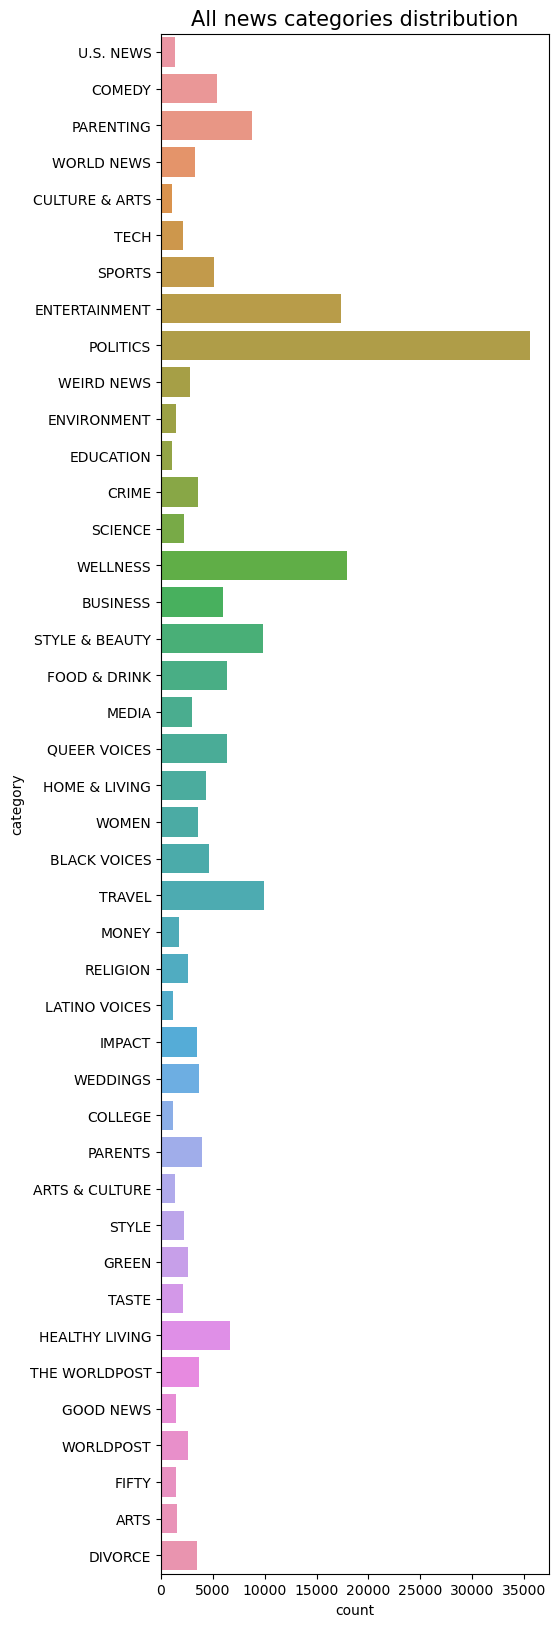

In [24]:
# Ploting  horizontal distribution for category column

plt.figure(figsize = [5, 20])
sns.countplot(y=dataset["category"], orient = 'h')
plt.title("All news categories distribution", fontsize = 15)
plt.show()

#### From the results above, there are in total of 42 categories of news. To accomodate with computing power, we will train models with the top 15 categories bold text

['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK', 'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING', 'PARENTS']


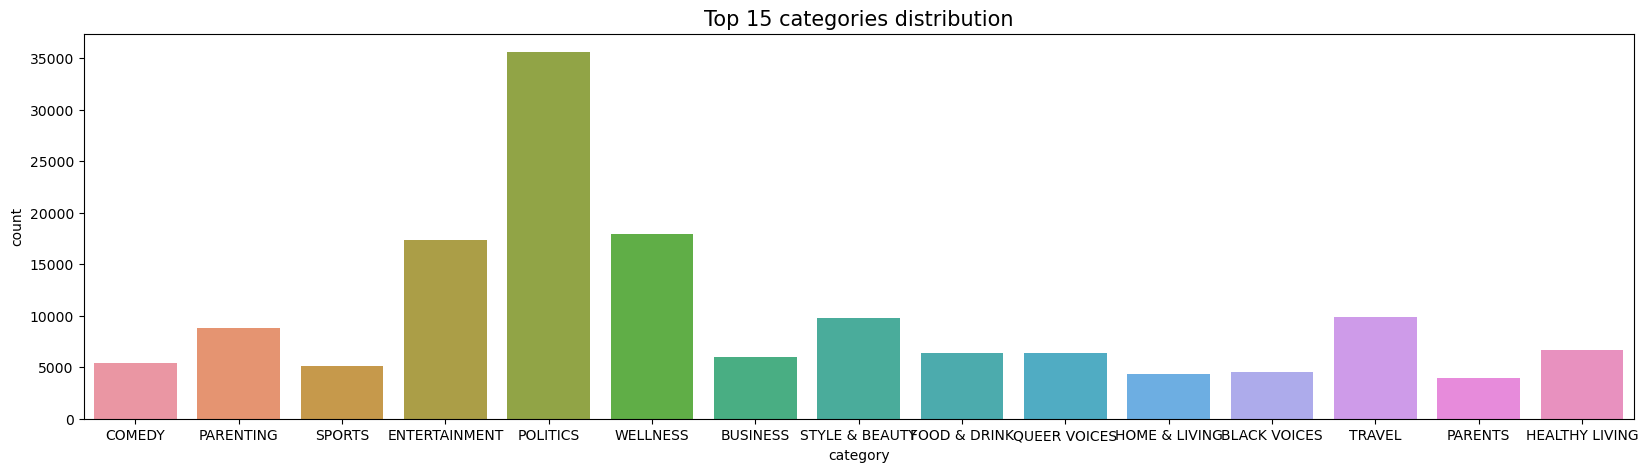

In [25]:
# Considering only top 15 category for train data

top_categories = list(dataset["category"].value_counts().nlargest(15).keys())
print(top_categories)

# Plotting distribution 

dataset_top = dataset[dataset['category'].isin(top_categories)]
plt.figure(figsize = [20, 5])
sns.countplot(x=dataset_top["category"])
plt.title("Top 15 categories distribution", fontsize = 15)
plt.show()

**There are around 35000 news in "POLITICS" group, which is the largest group. But most of the groups contain less than 7000 news. In order to solve imbalanced dataset issue, we use upsample technique.**

In [26]:
# Upsampling the data

SEED = 42
df_list = []

#Get news in top 15 categories

for i in top_categories:
    df_list.append(pd.DataFrame(dataset_top[dataset_top["category"]==i]))
for i in range(len(df_list)):
    df_list[i] = pd.DataFrame(df_list[i][df_list[i]["short_description"]!=""])
for i in range(len(df_list)):
    df_list[i] = df_list[i].sample(df_list[0].shape[0], replace=True, random_state=SEED)
df_upsample = pd.concat(df_list)
print(df_upsample.shape)

(486600, 3)


In [27]:
#Check 5 samples of short description

df_list[0].short_description.iloc[0:5].to_list()

['It was only a matter of time before the Panama Papers controversy and the Unaoil bribery scandal overlapped. Leaked emails',
 "The plan is very hazy, but it's different than what other Republicans have proposed.",
 "MeidasTouch's #GOPBetrayedAmerica spot calls out Republican opposition to a commission to investigate the Jan. 6 insurrection.",
 '"The risks of fracking to our health and to our environment are real," state Attorney General Xavier Becerra says.',
 'Sen. Mitch McConnell (R-Ky.) has long been the most vocal opponent of campaign finance regulation in Congress.']

#### There are punctuations and different forms of words in short description. We will remofve punctuations and links if there are any in the news. Lemmatization technique will be applied to reduce inflectional forms.

### Data Cleaning

In [28]:
#nltk.download('all')
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

In [29]:
#Clean the text

df_upsample["text"] = df_upsample["headline"] + " " + df_upsample["short_description"]
df_upsample['text'] = df_upsample['text'].map(lambda x: clean_text(x))
X, y = df_upsample['text'], df_upsample["category"]

In [30]:
#Text after cleaning

print(X.iloc[0])

unaoil scandal panama paper matter time panama paper controversy unaoil bribery scandal overlapped leaked email


In [31]:
#Data size after upsampling

print(y.value_counts())

POLITICS          32440
WELLNESS          32440
ENTERTAINMENT     32440
TRAVEL            32440
STYLE & BEAUTY    32440
PARENTING         32440
HEALTHY LIVING    32440
QUEER VOICES      32440
FOOD & DRINK      32440
BUSINESS          32440
COMEDY            32440
SPORTS            32440
BLACK VOICES      32440
HOME & LIVING     32440
PARENTS           32440
Name: category, dtype: int64


In [32]:
# Split data into training data and testing data
# split the data

X_train, X_test, y_train, y_test = train_test_split(df_upsample['text'], df_upsample['category'], test_size=0.2, stratify=df_upsample['category'])
le = preprocessing.LabelEncoder()     # label encoder
le.fit(top_categories)

# category to label

y_train_label = le.transform(y_train)     # Encoding train label
y_test_label = le.transform(y_test)     # Encoding test label

#Use tf-idf vectorizer to fit news

tf_idf_vectorizer = TfidfVectorizer()    #  To convert raw documents into a matrix of TF-IDF features
X_train_t = tf_idf_vectorizer.fit_transform(X_train)
X_test_t = tf_idf_vectorizer.transform(X_test)
print(X_train.shape, X_train_t.shape)

(389280,) (389280, 77621)


## KNN Model

In [33]:
# Building KNN Model

#Fit X to SVD
svd = TruncatedSVD(n_components=7, random_state=SEED,n_iter=7)    # Truncated SVD generates the matrices with the specified number of columns
X_train_t_final = svd.fit_transform(X_train_t)
X_test_t_final = svd.transform(X_test_t)
print(X_train_t_final.shape)

#Build KNN model
knn = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree')
knn.fit(X_train_t_final, y_train_label)
pred_knn = knn.predict(X_test_t_final)

(389280, 7)


C:\Users\Sai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### KNN Model validation

In [34]:
# KNN Validation

print("F1 Score:", metrics.f1_score(le.inverse_transform(y_test_label), le.inverse_transform(pred_knn), average='weighted'))
print(metrics.classification_report(le.inverse_transform(y_test_label), le.inverse_transform(pred_knn)))

F1 Score: 0.7169029682045005
                precision    recall  f1-score   support

  BLACK VOICES       0.76      0.94      0.84      6488
      BUSINESS       0.69      0.84      0.76      6488
        COMEDY       0.72      0.90      0.80      6488
 ENTERTAINMENT       0.57      0.37      0.45      6488
  FOOD & DRINK       0.76      0.80      0.78      6488
HEALTHY LIVING       0.70      0.83      0.76      6488
 HOME & LIVING       0.81      0.93      0.87      6488
     PARENTING       0.75      0.66      0.70      6488
       PARENTS       0.79      0.96      0.87      6488
      POLITICS       0.75      0.46      0.57      6488
  QUEER VOICES       0.72      0.79      0.75      6488
        SPORTS       0.73      0.90      0.81      6488
STYLE & BEAUTY       0.80      0.69      0.74      6488
        TRAVEL       0.68      0.56      0.61      6488
      WELLNESS       0.64      0.35      0.45      6488

      accuracy                           0.73     97320
     macro avg   

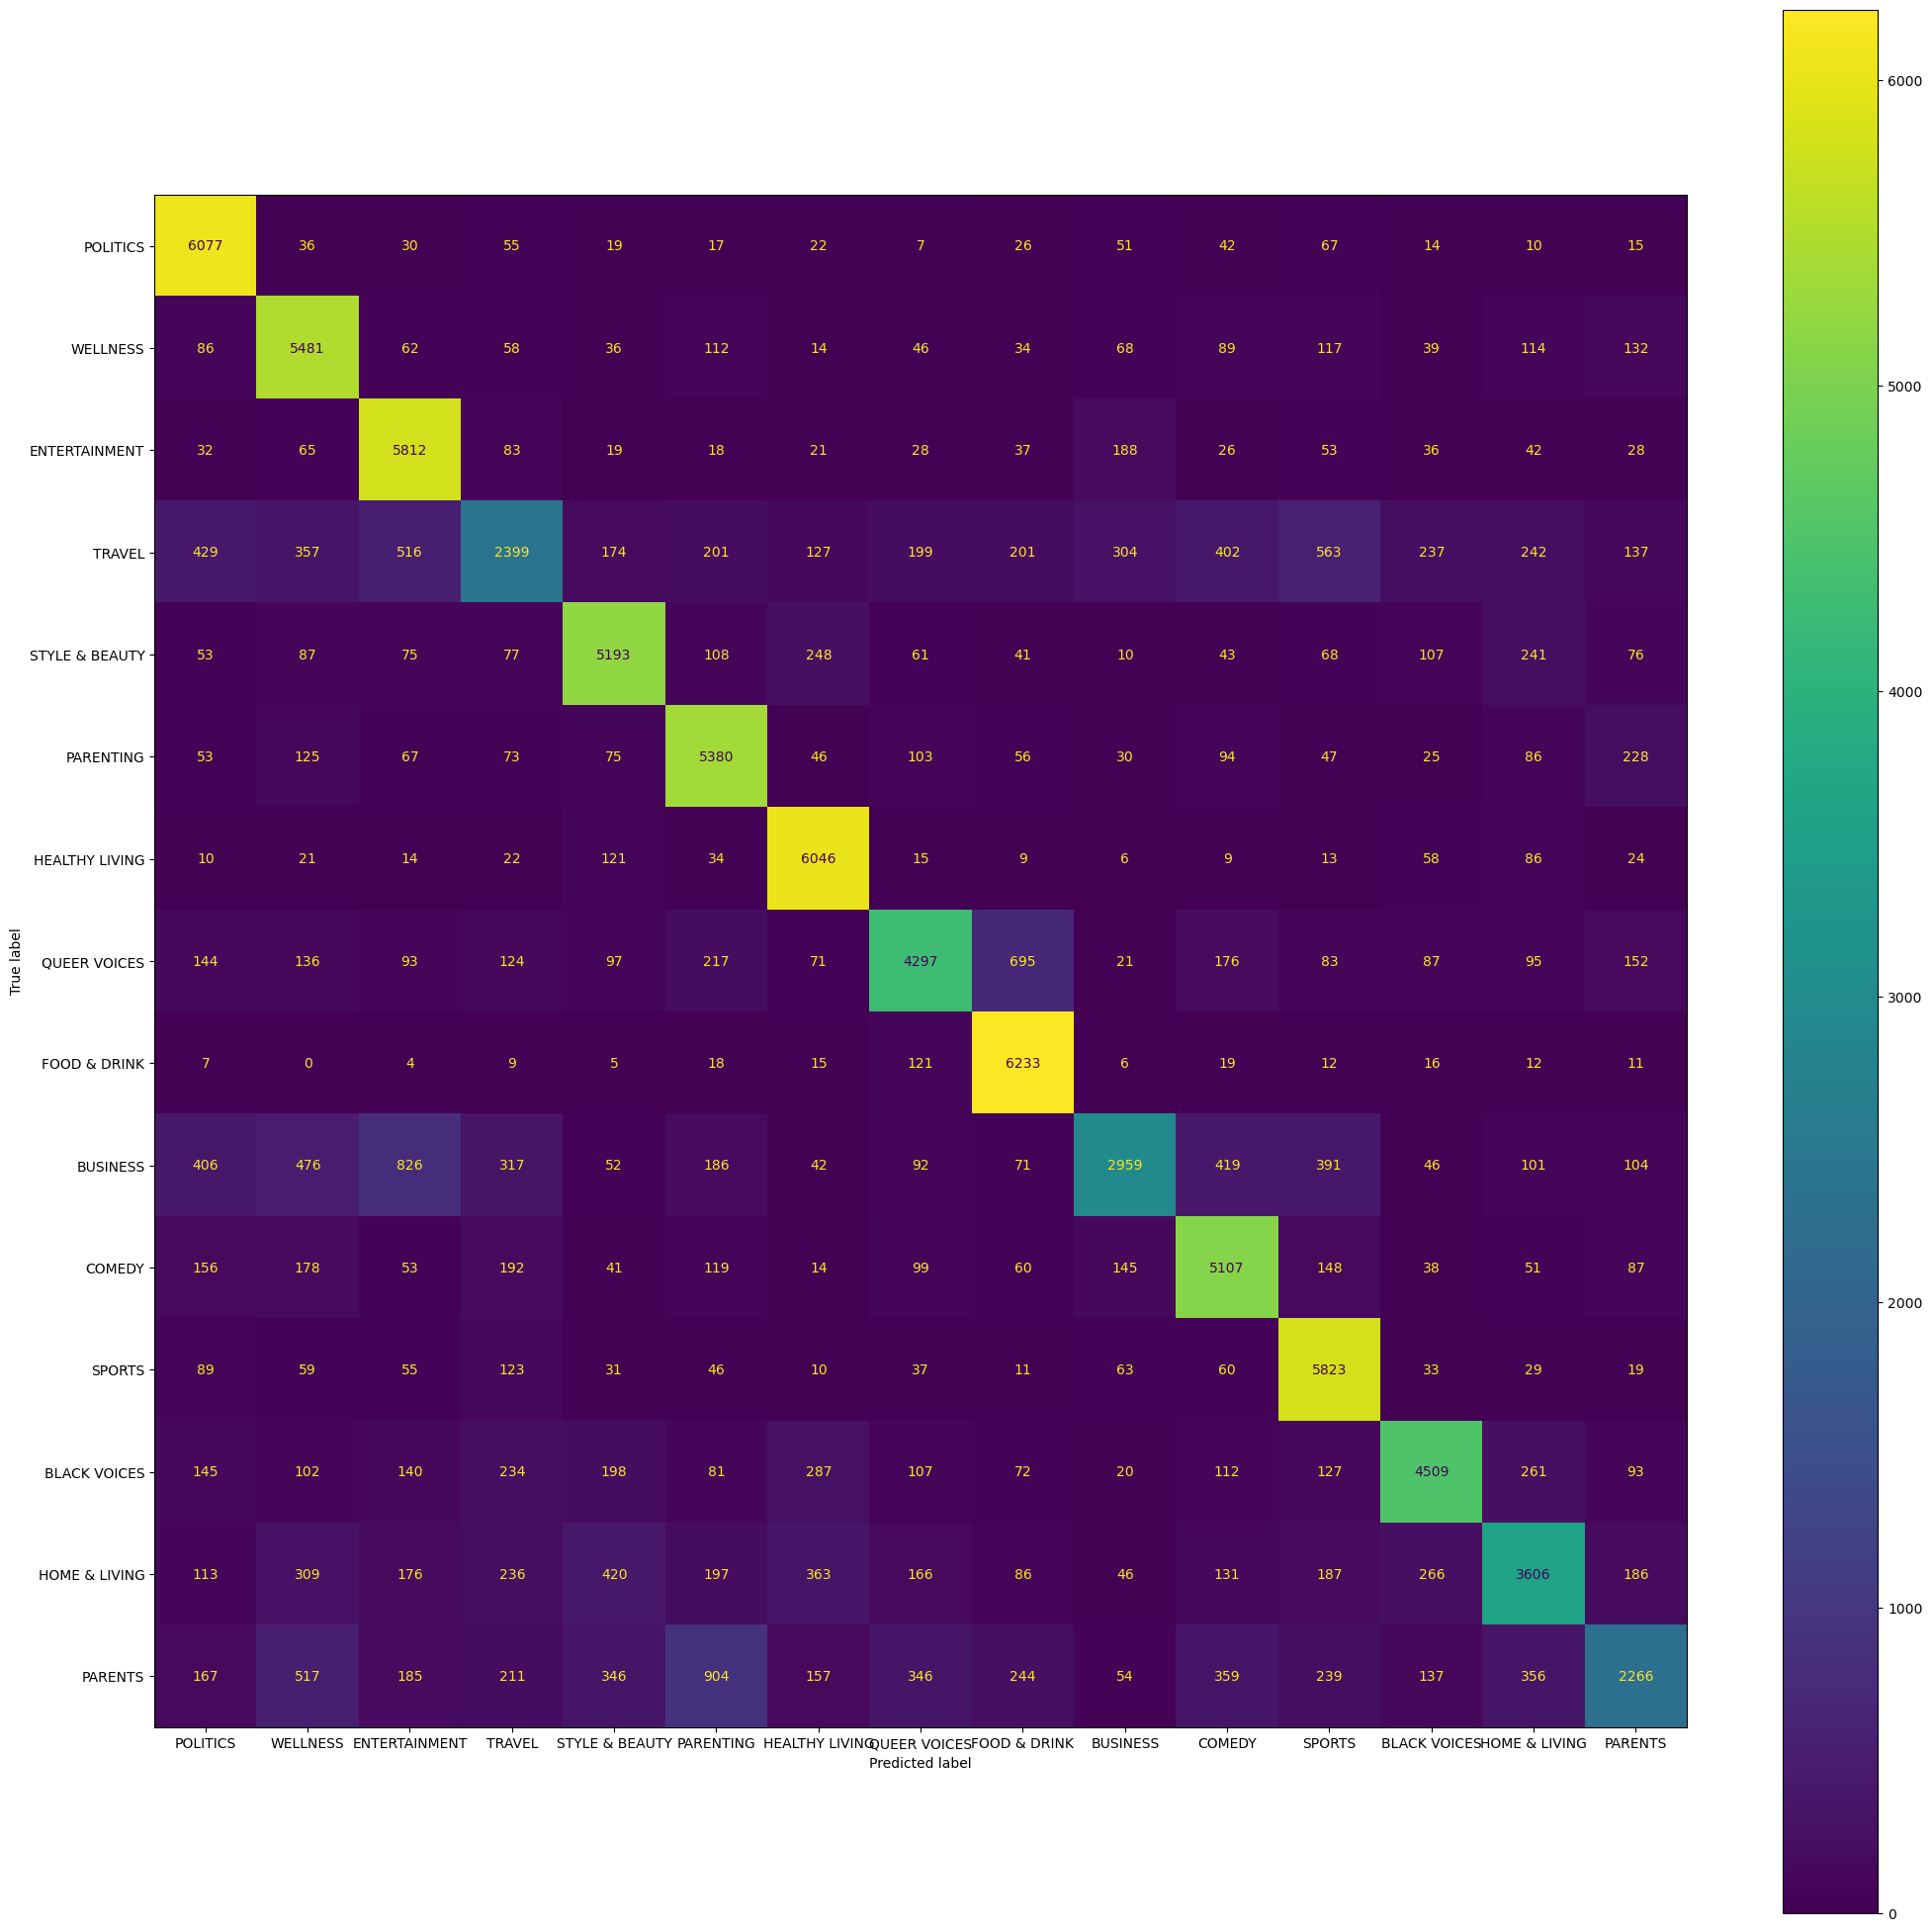

In [35]:
fig, ax = plt.subplots(figsize=(25, 25))
confusion_matrix_knn = metrics.confusion_matrix(y_test_label.tolist(), pred_knn.tolist())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = top_categories)
cm_display.plot(ax=ax)
plt.show()

## MultinomialNB Model

In [36]:
# BUilding MultinomialNB Model

nb = MultinomialNB(alpha=1e-4, fit_prior=False)
nb.fit(X_train_t, y_train_label)
pred_mnb = nb.predict(X_test_t)

In [37]:
# MultinomialNB Validation 

print("F1 Score:", metrics.f1_score(le.inverse_transform(y_test_label), le.inverse_transform(pred_mnb), average='weighted'))
print(metrics.classification_report(le.inverse_transform(y_test_label), le.inverse_transform(pred_mnb)))

F1 Score: 0.8889133304166135
                precision    recall  f1-score   support

  BLACK VOICES       0.92      0.90      0.91      6488
      BUSINESS       0.90      0.91      0.90      6488
        COMEDY       0.89      0.90      0.90      6488
 ENTERTAINMENT       0.86      0.84      0.85      6488
  FOOD & DRINK       0.92      0.95      0.94      6488
HEALTHY LIVING       0.81      0.83      0.82      6488
 HOME & LIVING       0.95      0.94      0.95      6488
     PARENTING       0.83      0.83      0.83      6488
       PARENTS       0.84      0.89      0.87      6488
      POLITICS       0.86      0.85      0.85      6488
  QUEER VOICES       0.93      0.92      0.93      6488
        SPORTS       0.96      0.96      0.96      6488
STYLE & BEAUTY       0.94      0.92      0.93      6488
        TRAVEL       0.91      0.93      0.92      6488
      WELLNESS       0.80      0.79      0.79      6488

      accuracy                           0.89     97320
     macro avg   

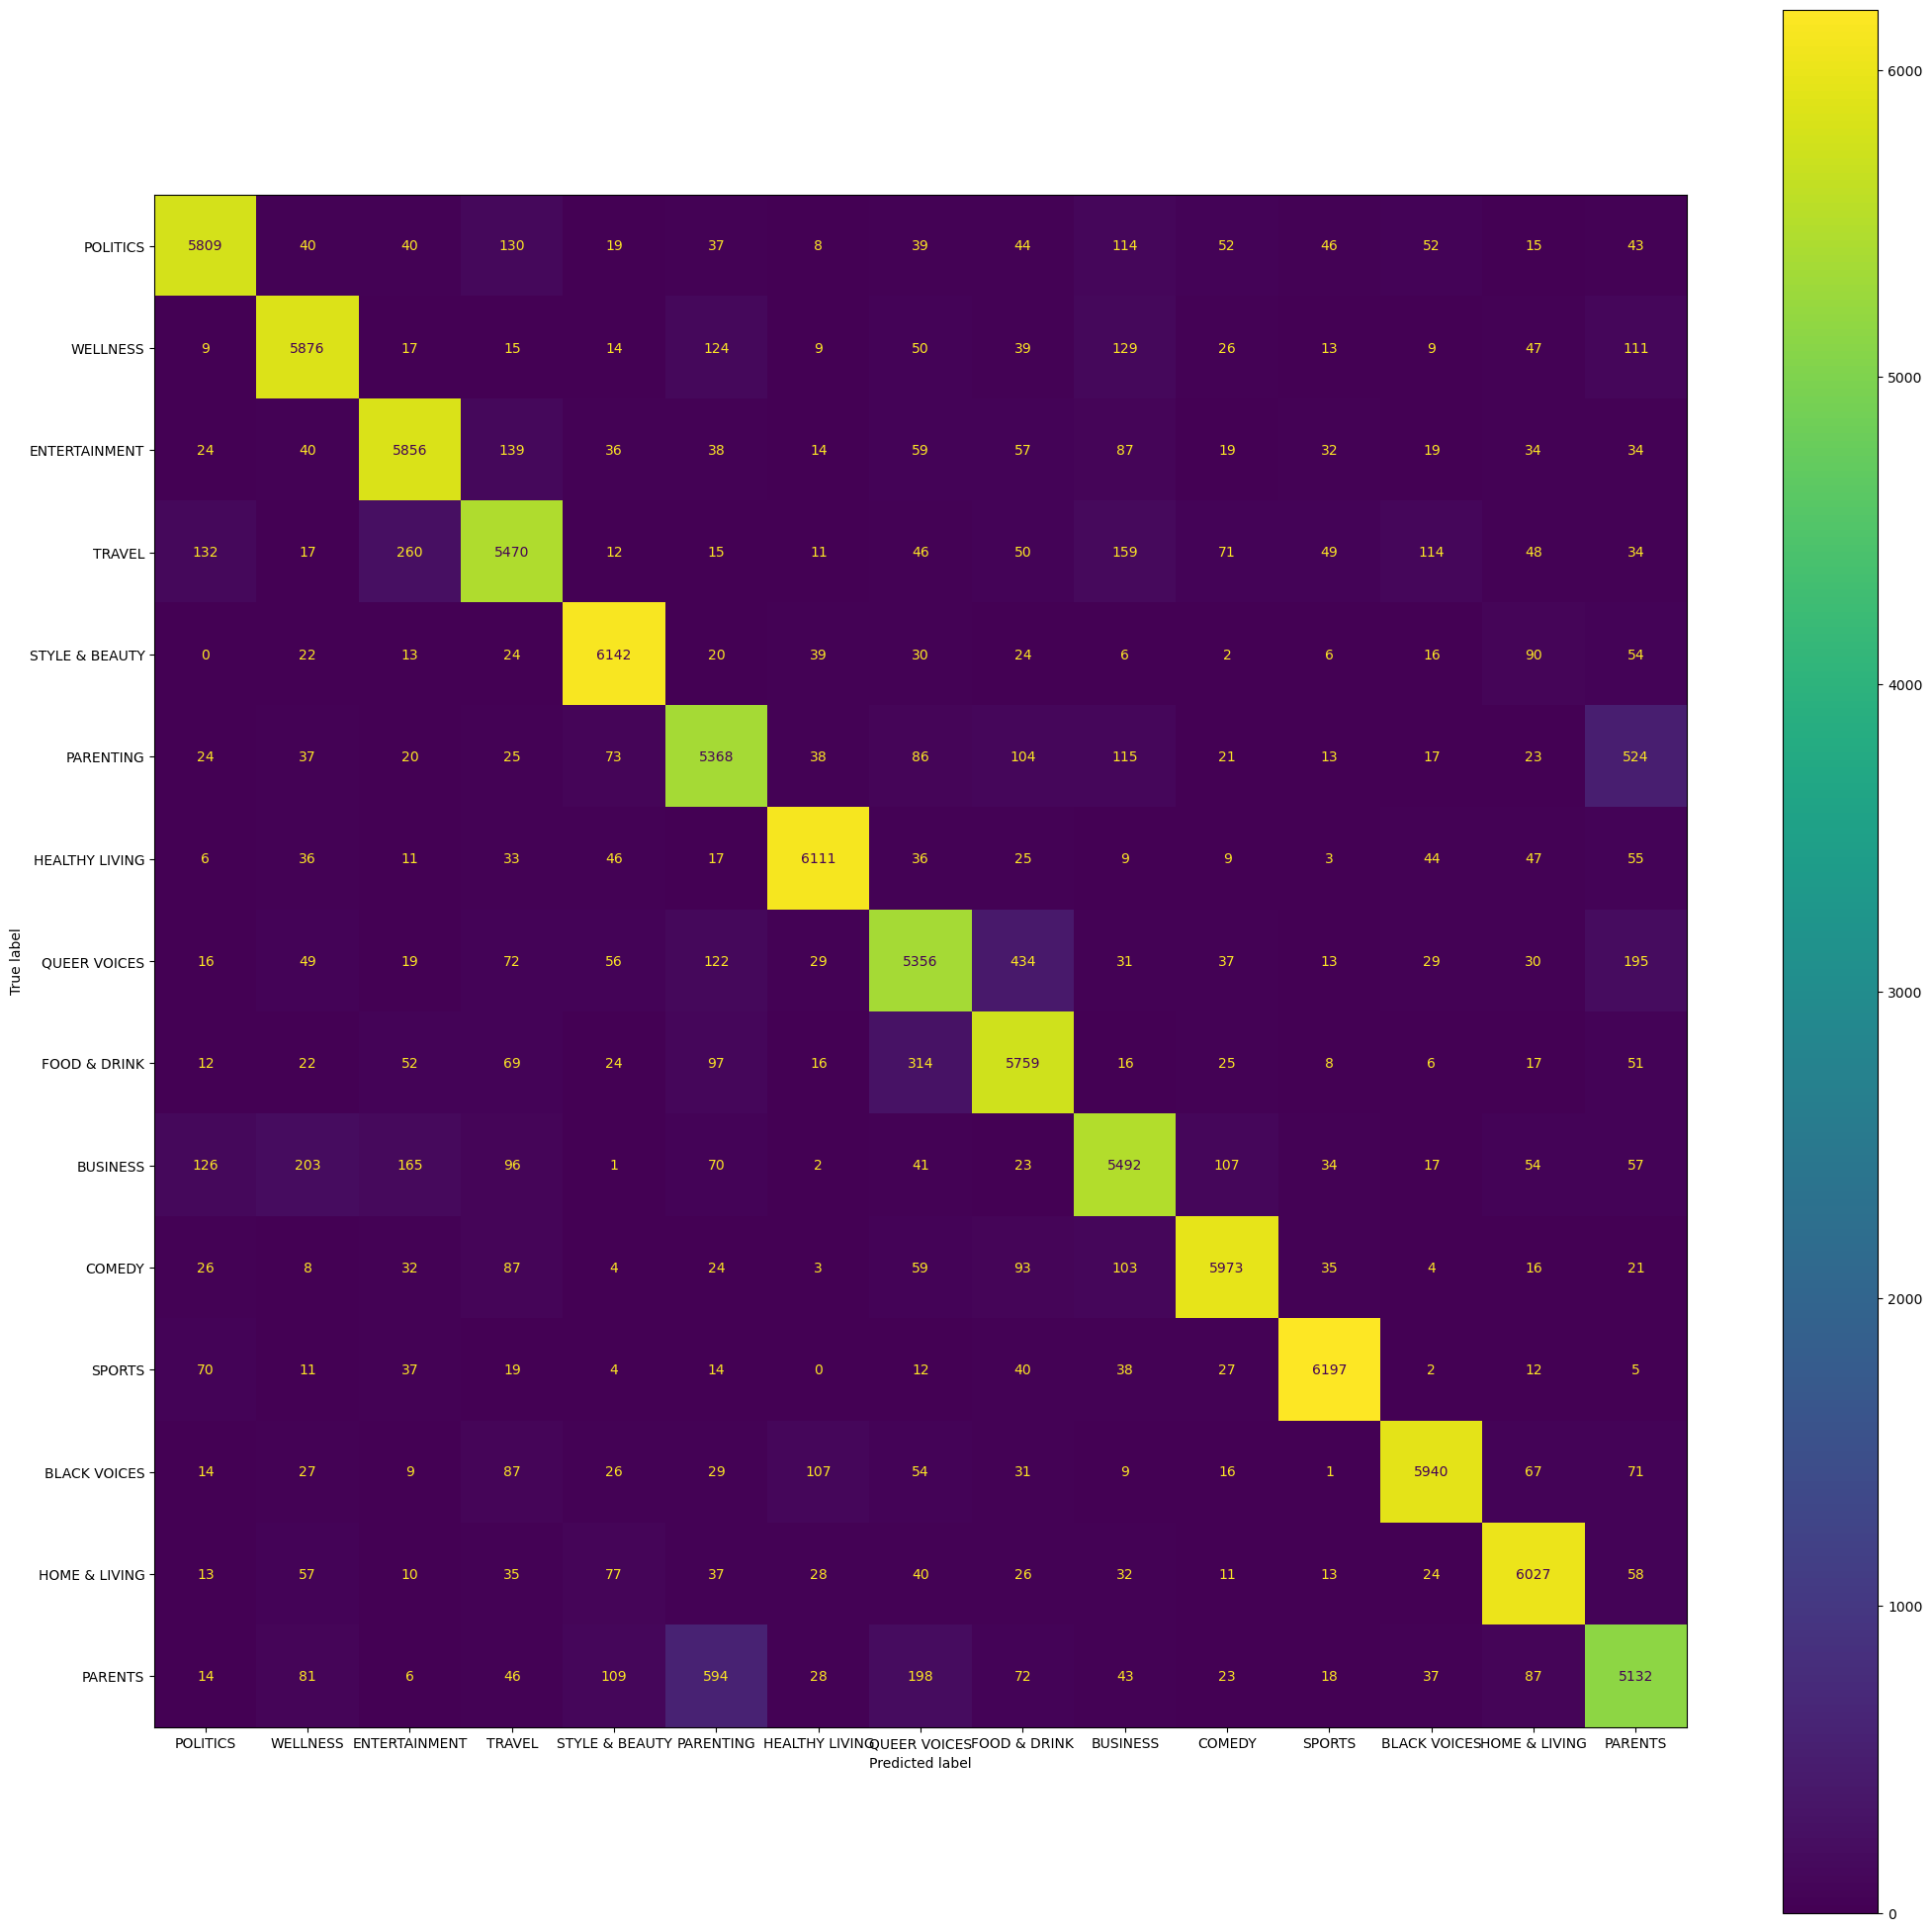

In [38]:
fig, ax = plt.subplots(figsize=(25, 25))
confusion_matrix_mnb = metrics.confusion_matrix(y_test_label.tolist(), pred_mnb.tolist())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mnb, display_labels = top_categories)
cm_display.plot(ax=ax)
plt.show()